In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import datetime
import time
import seaborn as sns
import psutil
import cv2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

np.random.seed(42)

# Get the data
https://www.kaggle.com/datasets/crawford/emnist  
byclass 사용  
  
train: 697,932   
test: 116,323   
total: 814,255   
classes: ByClass 62 (unbalanced)

In [2]:
path = './'
train_byclass = pd.read_csv(path+'archive/emnist-byclass-train.csv', header=None)
test_byclass = pd.read_csv(path+'archive/emnist-byclass-test.csv', header=None)

# Discover and visualize the data

In [3]:
train_byclass.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(f"train shape : {train_byclass.shape}")
print(f"test shape : {test_byclass.shape}")

train shape : (697932, 785)
test shape : (116323, 785)


In [12]:
train_byclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697932 entries, 0 to 697931
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 4.1 GB


In [13]:
test_byclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116323 entries, 0 to 116322
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 696.7 MB


In [5]:
s_alph=list(string.ascii_lowercase)
l_alph=list(string.ascii_uppercase)
number = [str(i) for i in range(10)]
byclass_classes=np.transpose(number+l_alph+s_alph)
print(byclass_classes) 

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [6]:
 # data label 나누기
X_train = train_byclass.iloc[:, 1:].to_numpy()
train_labels = np.transpose(byclass_classes[train_byclass.iloc[:,0].tolist()])
X_test = test_byclass.iloc[:, 1:].to_numpy()
test_labels = np.transpose(byclass_classes[test_byclass.iloc[:,0].tolist()])

'I'

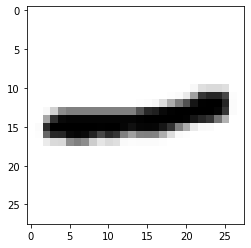

In [8]:
i = 105
plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
train_labels[i]

In [9]:
# one-hot coding
y_train = pd.get_dummies(train_labels).to_numpy()
y_test = pd.get_dummies(test_labels).to_numpy()

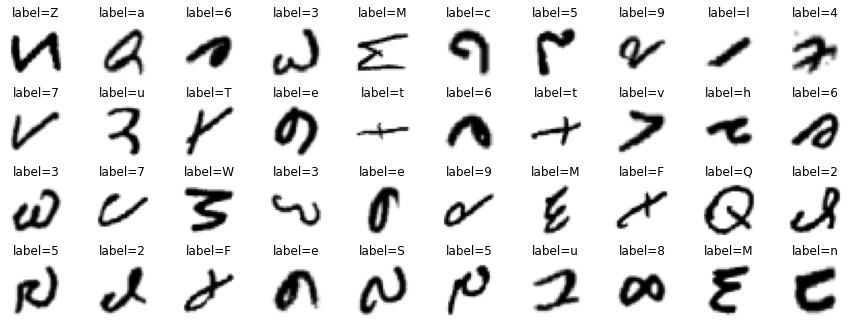

In [12]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(f'label={train_labels[i]}', y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=-0.1)
plt.show()

In [13]:
# 이미지 회전 함수
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])

In [14]:
# 전체 이미지 회전 및 teonsor 형태로 변환
X_train = (np.apply_along_axis(rotate, 1, X_train)/255).reshape(-1, 28, 28, 1).astype(float)
X_test = (np.apply_along_axis(rotate, 1, X_test)/255).reshape(-1, 28, 28, 1).astype(float)

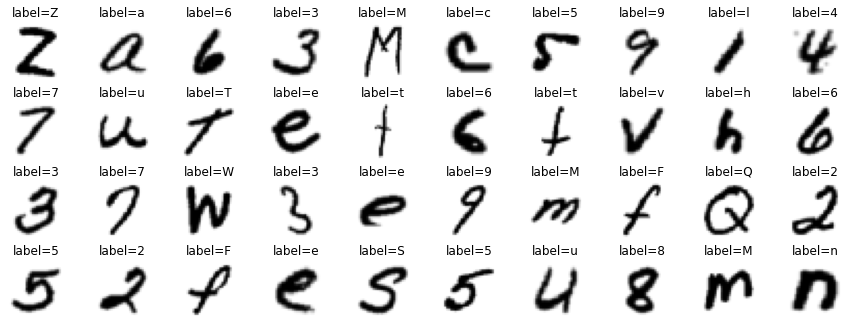

In [15]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(f'label={train_labels[i]}', y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=-0.1)
plt.show()

# Prepare the data

In [16]:
#train val test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
del train_byclass, test_byclass, byclass_classes, train_labels, test_labels

In [14]:
# 위의 과정 생략을 위해 np로 압축한 파일 load
data_npz = np.load('./emnist_byclass_compressed.npz')
X_train = data_npz['X_train']
X_val = data_npz['X_val']
X_test = data_npz['X_test']
y_train = data_npz['y_train']
y_val = data_npz['y_val']
y_test = data_npz['y_test']

# Select and train a model with fine tune

## 기본설정
optimizer = Adam(learning_rate=3e-4)  
loss='categorical_crossentropy'  
callback = ModelCheckpoint, EarlyStopping, ReduceLROnPlateau  
epoch = 50  
batch_size = 128  

In [3]:
import tensorflow as tf
tf.random.set_seed(42)
import keras
from tensorflow.keras.layers import Input, Conv2D, Add, Flatten, Dense
from tensorflow.keras.layers import SeparableConv2D, ReLU, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
import tensorflow_addons as tfa
import pydot
import graphviz
from itertools import product

In [4]:
# confusion matrix
def plot_confusion_matrix(cm, class_names, figsize=(8, 8)):
    cm = cm.numpy()
    figure = plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

s_alph=list(string.ascii_lowercase)
l_alph=list(string.ascii_uppercase)
number = [str(i) for i in range(10)]
byclass_clss=np.transpose(number+l_alph+s_alph)

## baseline

###  LeNet5

In [5]:
def LeNet5(input_shape=(28,28,1), classes=10):
    model = keras.Sequential()

    model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D())

    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='relu'))
    model.add(AveragePooling2D())

    model.add(Flatten())

    model.add(Dense(units=120, activation='relu'))

    model.add(Dense(units=84, activation='relu'))

    model.add(Dense(units=classes, activation = 'softmax'))
    
    return model

In [6]:
keras.backend.clear_session()
model_LeNet5 = LeNet5(classes=62)
model_LeNet5.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_LeNet5.summary()

checkpoint_dir = './model_LeNet5_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'
MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True)
ES = EarlyStopping(monitor='val_loss', patience=5)
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, min_lr=1e-4)

callbacks_list = [ES, MCP, RLP]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

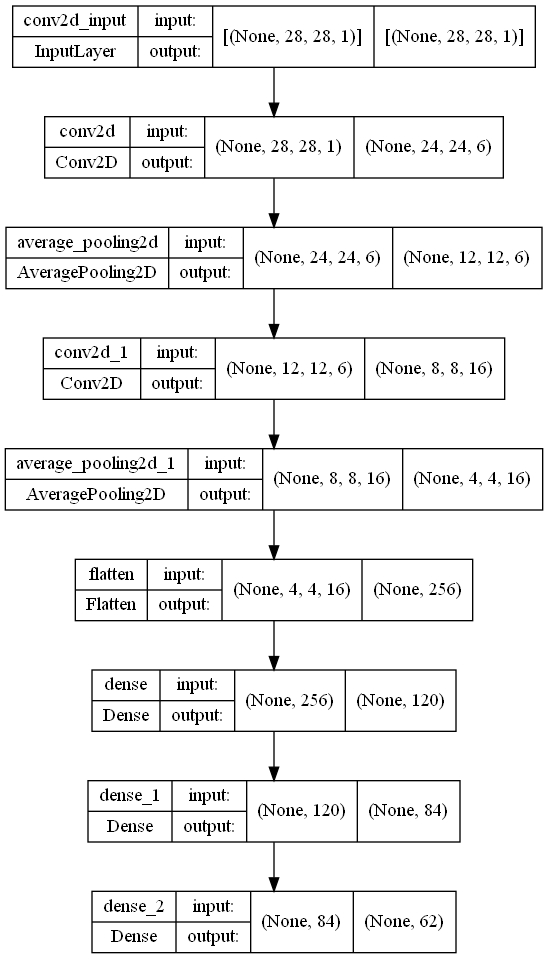

In [7]:
plot_model(model_LeNet5, to_file='./models/model_LeNet5_shapes.png', show_shapes=True)

In [8]:
start = time.time()

history_model_LeNet5 = model_LeNet5.fit(X_train, y_train, epochs=50, batch_size=128,
                                        validation_data=(X_val, y_val), callbacks=callbacks_list)
train_time = time.time() - start

Epoch 1/50
4363/4363 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.7807
Epoch 1: val_loss improved from inf to 0.50709, saving model to ./model_LeNet5_checkpoint\cp-01-0.5071.ckpt
4363/4363 [==============================] - 29s 6ms/step - loss: 0.6917 - accuracy: 0.7807 - val_loss: 0.5071 - val_accuracy: 0.8225 - lr: 0.0010
Epoch 2/50
4353/4363 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.8362
Epoch 2: val_loss improved from 0.50709 to 0.44651, saving model to ./model_LeNet5_checkpoint\cp-02-0.4465.ckpt
4363/4363 [==============================] - 24s 5ms/step - loss: 0.4645 - accuracy: 0.8362 - val_loss: 0.4465 - val_accuracy: 0.8418 - lr: 0.0010
Epoch 3/50
4354/4363 [============================>.] - ETA: 0s - loss: 0.4258 - accuracy: 0.8462
Epoch 3: val_loss improved from 0.44651 to 0.42123, saving model to ./model_LeNet5_checkpoint\cp-03-0.4212.ckpt
4363/4363 [==============================] - 24s 5ms/step - loss: 0.4258 - accur

In [10]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model_LeNet5.load_weights(latest)
start = time.time()
model_LeNet5.evaluate(X_test,y_test)
inference_time = time.time() - start


print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

3636/3636 [==============================] - 11s 3ms/step - loss: 0.3637 - accuracy: 0.8672
train time : 571.081 s
inference time : 11.482 s


### MobileNetV2

In [6]:
def zero_padding(x, size=((0,0),(2,2),(2,2),(0,0))):
    return np.pad(x, size)

# 28x28 -> 32x32 zero padding
X_train_zp = zero_padding(X_train)
X_val_zp = zero_padding(X_val)
X_test_zp = zero_padding(X_test)

In [7]:
model_MobileNetV2=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(32,32,1),
    alpha=1.0,
    include_top=True,
    weights= None,
    input_tensor=None,
    pooling='max',
    classes=62,
    classifier_activation='softmax',
    #**kwargs
)

In [8]:
keras.backend.clear_session()
model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_MobileNetV2.summary()

checkpoint_dir = './model_MobileNetV2_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'
MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True)
ES = EarlyStopping(monitor='val_loss', patience=5)
RLP = ReduceLROnPlateau(monitor='val_loss', patience=4, min_lr=1e-4)

callbacks_list = [ES, MCP, RLP]

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   288         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 4, 4, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 4, 4, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 4, 4, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 4, 4, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 2, 2, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 2, 2, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 2, 2, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 2, 2, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 2, 2, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 2, 2, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 2, 2, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 2, 2, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 1, 1, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 1, 1, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 1, 1, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 1, 1, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

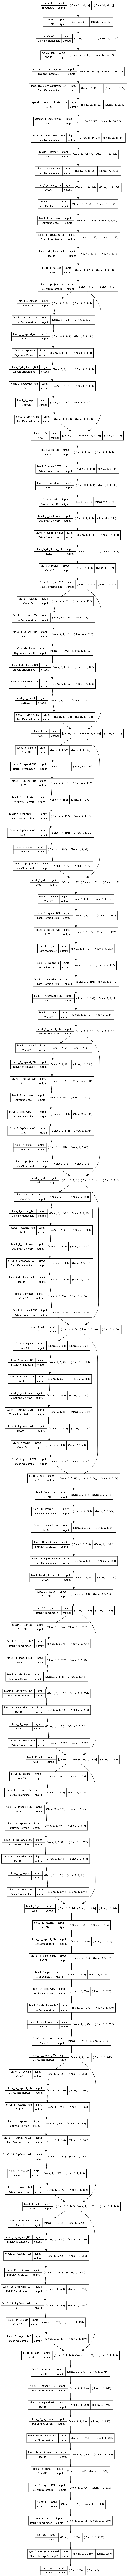

In [9]:
plot_model(model_MobileNetV2, to_file='./models/model_MobileNetV2_shapes.png', show_shapes=True)

In [10]:
start = time.time()

history_model_MobileNetV2 = model_MobileNetV2.fit(X_train_zp, y_train, epochs=50, batch_size=128,
                                                  validation_data=(X_val_zp, y_val), callbacks=callbacks_list)
train_time = time.time() - start

Epoch 1/50
4363/4363 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.7826
Epoch 1: val_loss improved from inf to 3.87474, saving model to ./model_MobileNetV2_checkpoint\cp-01-3.8747.ckpt
4363/4363 [==============================] - 160s 35ms/step - loss: 0.6699 - accuracy: 0.7826 - val_loss: 3.8747 - val_accuracy: 0.0604 - lr: 0.0010
Epoch 2/50
4363/4363 [==============================] - ETA: 0s - loss: 0.4553 - accuracy: 0.8394
Epoch 2: val_loss did not improve from 3.87474
4363/4363 [==============================] - 149s 34ms/step - loss: 0.4553 - accuracy: 0.8394 - val_loss: 12.9874 - val_accuracy: 0.3495 - lr: 0.0010
Epoch 3/50
4363/4363 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8450
Epoch 3: val_loss improved from 3.87474 to 2.18066, saving model to ./model_MobileNetV2_checkpoint\cp-03-2.1807.ckpt
4363/4363 [==============================] - 147s 34ms/step - loss: 0.4368 - accuracy: 0.8450 - val_loss: 2.1807 - val_accuracy: 0

In [11]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model_MobileNetV2.load_weights(latest)
start = time.time()
model_MobileNetV2.evaluate(X_test_zp, y_test)
inference_time = time.time()-start


print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

3636/3636 [==============================] - 38s 10ms/step - loss: 0.3194 - accuracy: 0.8794
train time : 2888.349 s
inference time : 38.471 s


## 각자 fine tune까지 끝낸 모델들

### 1. WR34

In [5]:
def Model1(): 
    # define model
    model = tf.keras.models.Sequential([
   
        # 1 convolution        
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(128, (5, 5), padding='same'), 
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.BatchNormalization(),

        # 2 convolution
        tf.keras.layers.Conv2D(64, (5, 5),padding='valid'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.BatchNormalization(),

        # feed to DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(486, activation='relu'),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(62, activation='softmax') 
    ])
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [6]:
keras.backend.clear_session()
model1 = Model1()

checkpoint_dir = './model1_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'

MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0, verbose=0, restore_best_weights = True, patience=3, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3, factor=0.2, min_lr=0.0001)
callbacks_list = [ES, MCP, RLP]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 activation (Activation)     (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        2

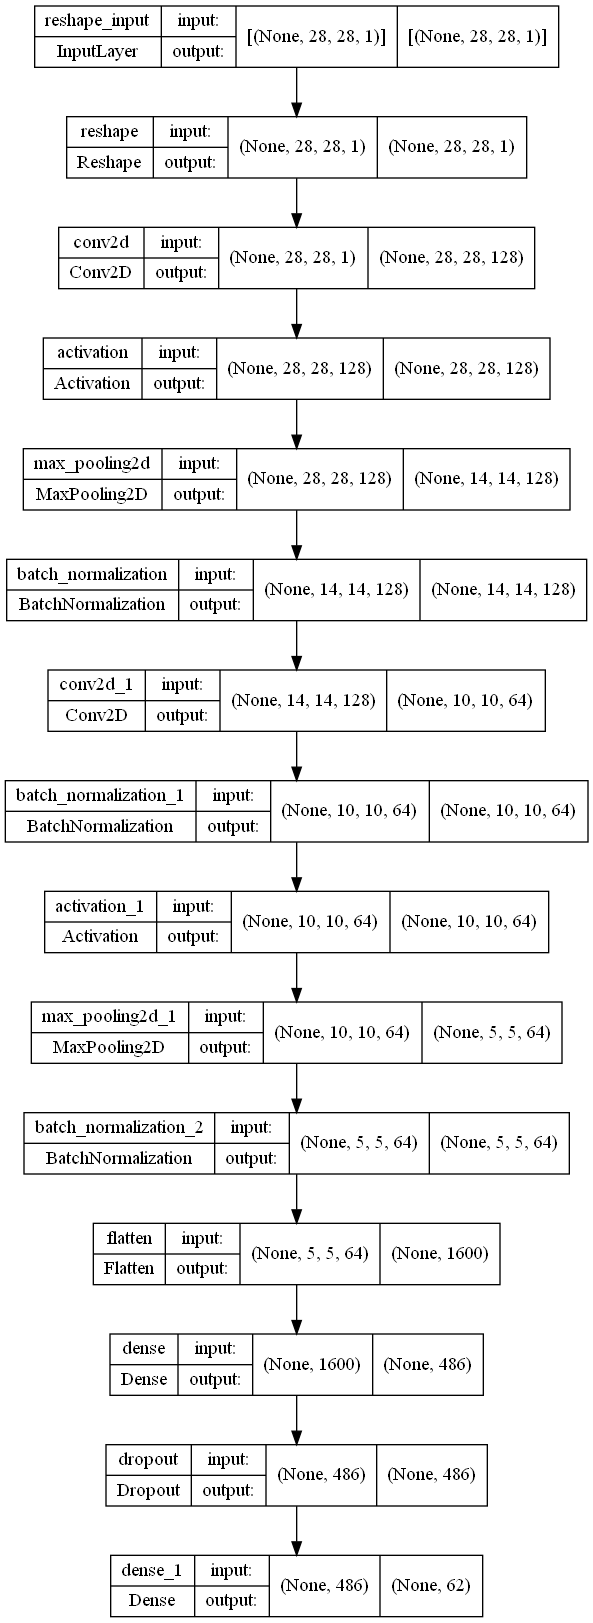

In [7]:
plot_model(model1, to_file='./models/model1_shapes.png', show_shapes=True)

In [8]:
start = time.time()
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32,
                      verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)
train_time = time.time()-start

Epoch 1/50
17449/17449 [==============================] - ETA: 0s - loss: 0.5679 - accuracy: 0.8128
Epoch 1: val_accuracy improved from -inf to 0.85115, saving model to ./model1_checkpoint\cp-01-0.4092.ckpt
17449/17449 [==============================] - 114s 6ms/step - loss: 0.5679 - accuracy: 0.8128 - val_loss: 0.4092 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 2/50
17449/17449 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.8501
Epoch 2: val_accuracy improved from 0.85115 to 0.86593, saving model to ./model1_checkpoint\cp-02-0.3756.ckpt
17449/17449 [==============================] - 117s 7ms/step - loss: 0.4225 - accuracy: 0.8501 - val_loss: 0.3756 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 3/50
17443/17449 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8564
Epoch 3: val_accuracy improved from 0.86593 to 0.86637, saving model to ./model1_checkpoint\cp-03-0.3638.ckpt
17449/17449 [==============================] - 114s 7ms/step - loss: 0.40

In [9]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model1.load_weights(latest)
start = time.time()
model1.evaluate(X_test,y_test, verbose=0)
inference_time = time.time()-start


print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

train time : 1273.057 s
inference time : 10.560 s


Text(0.5, 1.0, 'Loss Curves')

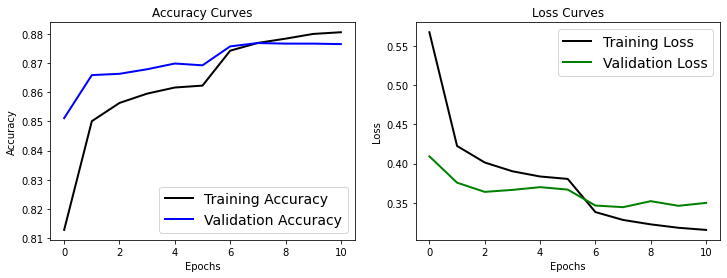

In [10]:
# Accuracy curve
plt.figure(figsize=[12,4])
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history1.history['accuracy'], 'black', linewidth=2.0)
ax1.plot(history1.history['val_accuracy'], 'blue', linewidth=2.0)
ax1.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history1.history['loss'], 'black', linewidth=2.0)
ax2.plot(history1.history['val_loss'], 'green', linewidth=2.0)
ax2.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

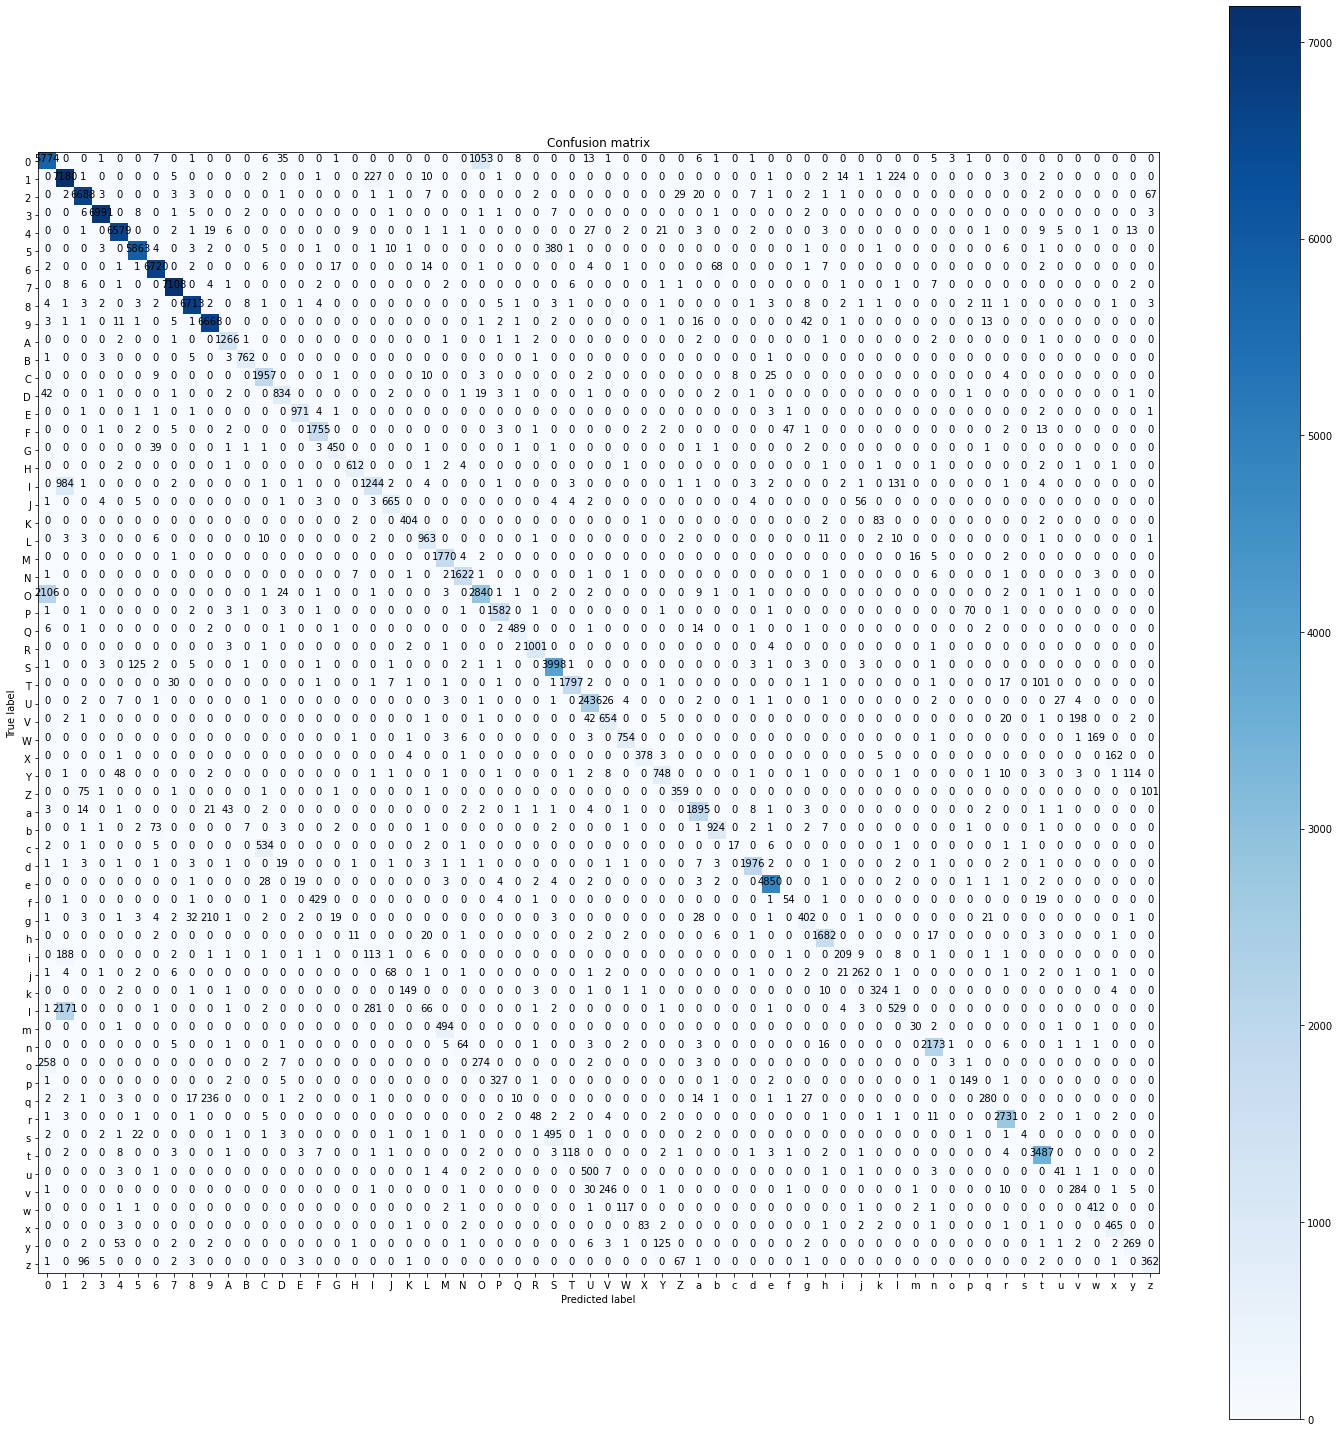

In [11]:
y_pred=model1.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [12]:
model1.save('./models/model1.h5')

## 2. KJH

In [8]:
def model2(model_input):
    x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(model_input)
    x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)
    
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)
    
    x = Flatten()(x)
    x = Dense(units=512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.5)(x)
    model_output = Dense(units=62, activation='softmax')(x)
    
    model = Model(model_input, model_output)

    return model

In [9]:
keras.backend.clear_session()
X_input = Input(shape = (28,28,1))
model2 = model2(X_input)
model2.compile(optimizer=Adam(learning_rate=3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

checkpoint_dir = './model2_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'
MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True)
ES = EarlyStopping(monitor='val_loss', patience=5)
RLP = ReduceLROnPlateau(monitor='val_loss', patience=4, min_lr=1e-4)

callbacks_list = [ES, MCP, RLP]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        4640  

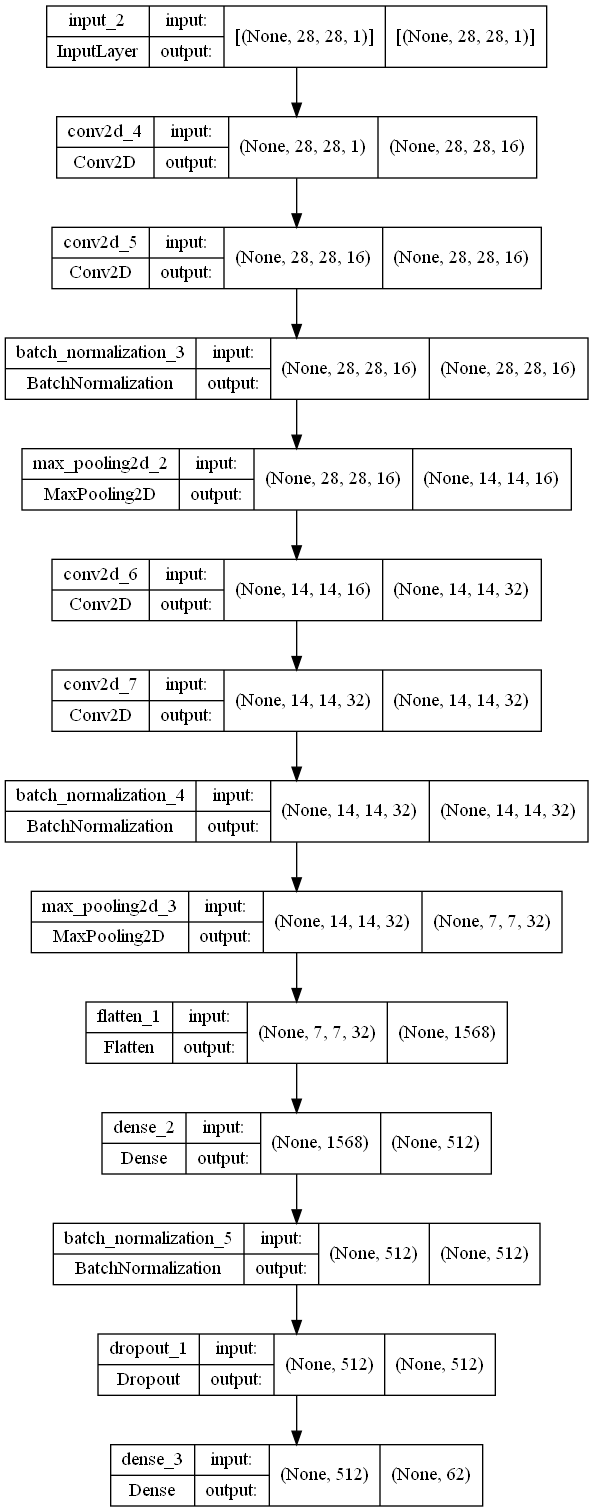

In [10]:
plot_model(model2, to_file='./models/model2_shapes.png', show_shapes=True)

In [11]:
start = time.time()
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=128,
                      verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)
train_time = time.time()-start

Epoch 1/50
4363/4363 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.8016
Epoch 1: val_loss improved from inf to 0.41128, saving model to ./model2_checkpoint\cp-01-0.4113.ckpt
4363/4363 [==============================] - 43s 9ms/step - loss: 0.6197 - accuracy: 0.8016 - val_loss: 0.4113 - val_accuracy: 0.8530 - lr: 3.0000e-04
Epoch 2/50
4363/4363 [==============================] - ETA: 0s - loss: 0.4243 - accuracy: 0.8494
Epoch 2: val_loss improved from 0.41128 to 0.37915, saving model to ./model2_checkpoint\cp-02-0.3792.ckpt
4363/4363 [==============================] - 40s 9ms/step - loss: 0.4243 - accuracy: 0.8494 - val_loss: 0.3792 - val_accuracy: 0.8618 - lr: 3.0000e-04
Epoch 3/50
4360/4363 [============================>.] - ETA: 0s - loss: 0.3914 - accuracy: 0.8577
Epoch 3: val_loss did not improve from 0.37915
4363/4363 [==============================] - 40s 9ms/step - loss: 0.3914 - accuracy: 0.8577 - val_loss: 0.3792 - val_accuracy: 0.8616 - lr: 3.0000e-0

In [13]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model2.load_weights(latest)
start = time.time()
model2.evaluate(X_test, y_test, verbose=0)
inference_time = time.time() - start


print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

train time : 684.323 s
inference time : 10.732 s


Text(0.5, 1.0, 'Loss Curves')

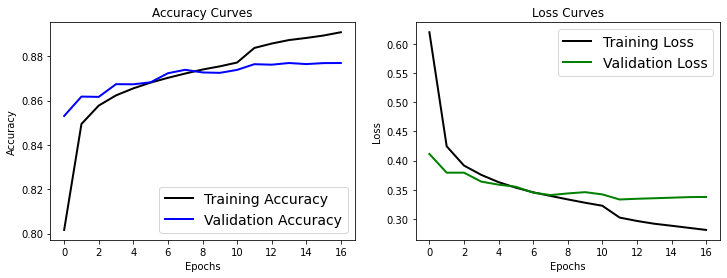

In [14]:
# Accuracy curve
plt.figure(figsize=[12,4])
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history2.history['accuracy'], 'black', linewidth=2.0)
ax1.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0)
ax1.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history2.history['loss'], 'black', linewidth=2.0)
ax2.plot(history2.history['val_loss'], 'green', linewidth=2.0)
ax2.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

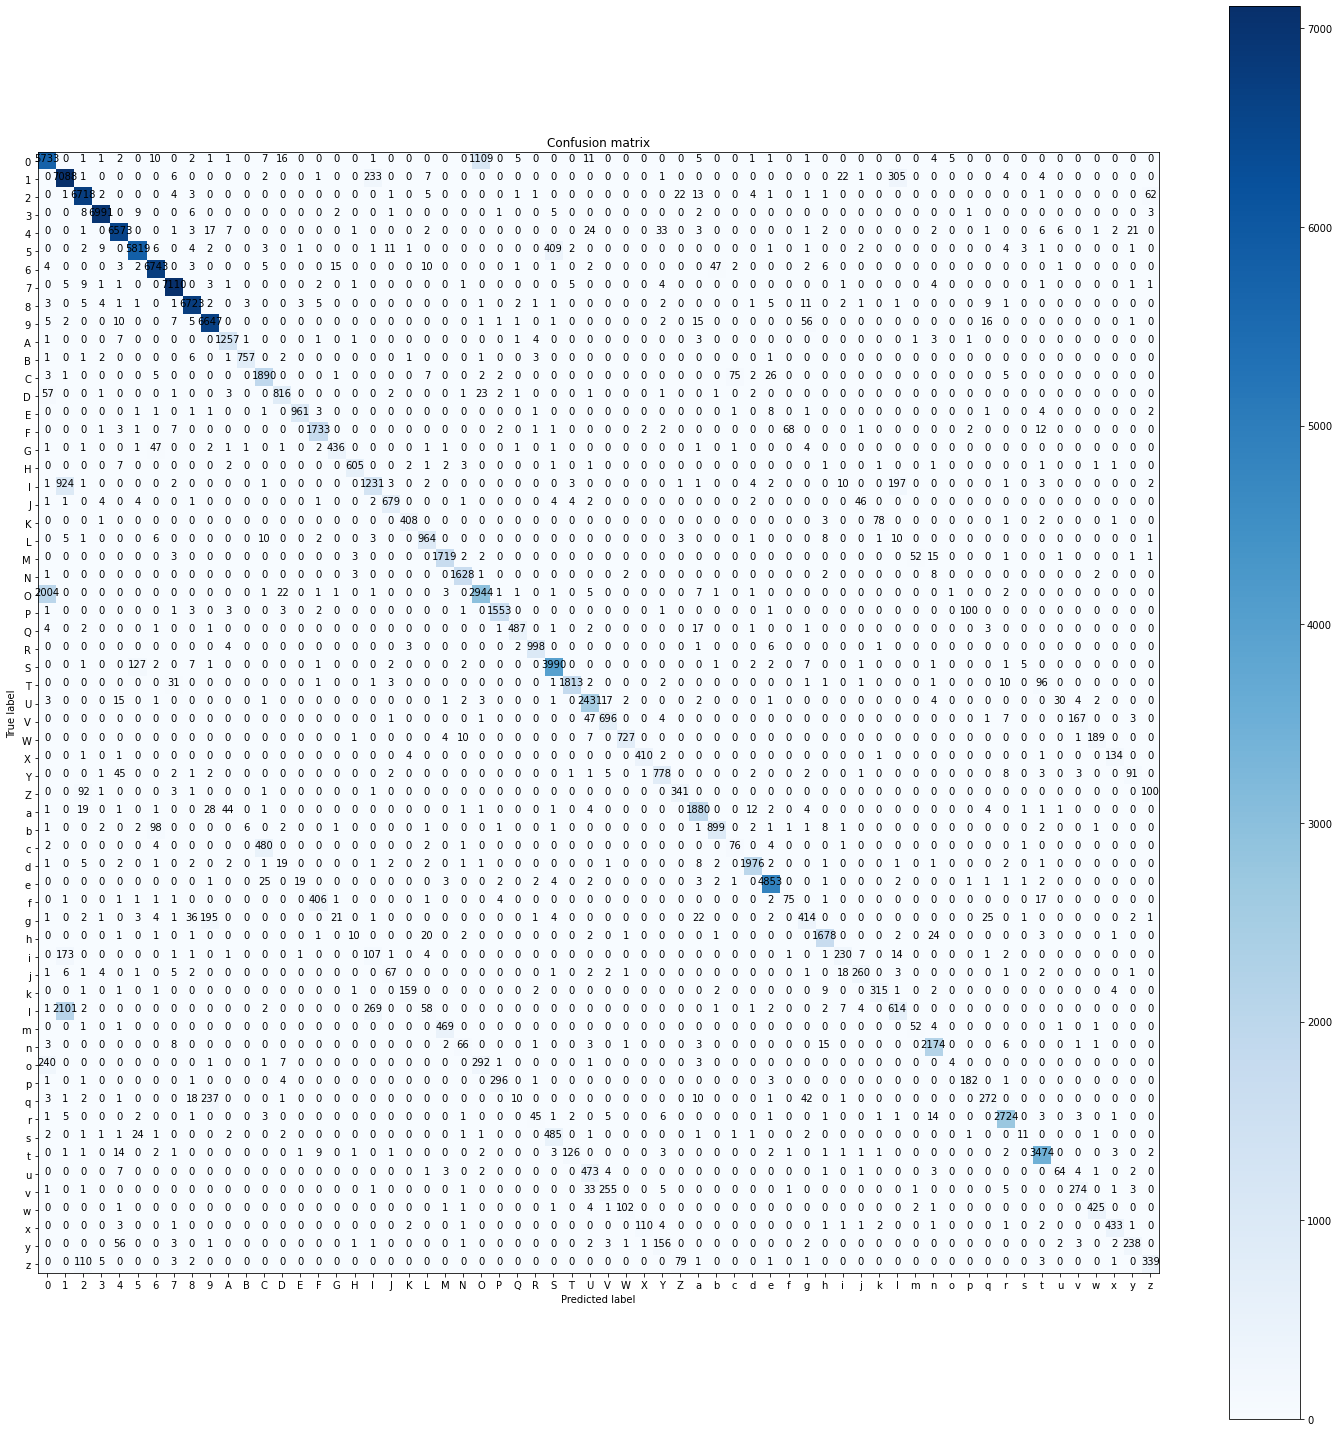

In [16]:
y_pred=model2.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [17]:
model2.save('./models/model2.h5')

## 3. Visualize Object Detection : CNN

In [5]:
# CNN 인공신경망 정의
def create_model():
    model = keras.Sequential()

    model.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, kernel_regularizer='l2', activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(62, activation='softmax'))
    
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
        
    return model

In [6]:
model3 = create_model()
model3.summary()

checkpoint_dir = './model3_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'
MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True)
ES = EarlyStopping(monitor='val_loss', patience=5)
RLP = ReduceLROnPlateau(monitor='val_loss', patience=4, min_lr=1e-4)

callbacks_list = [ES, MCP, RLP]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

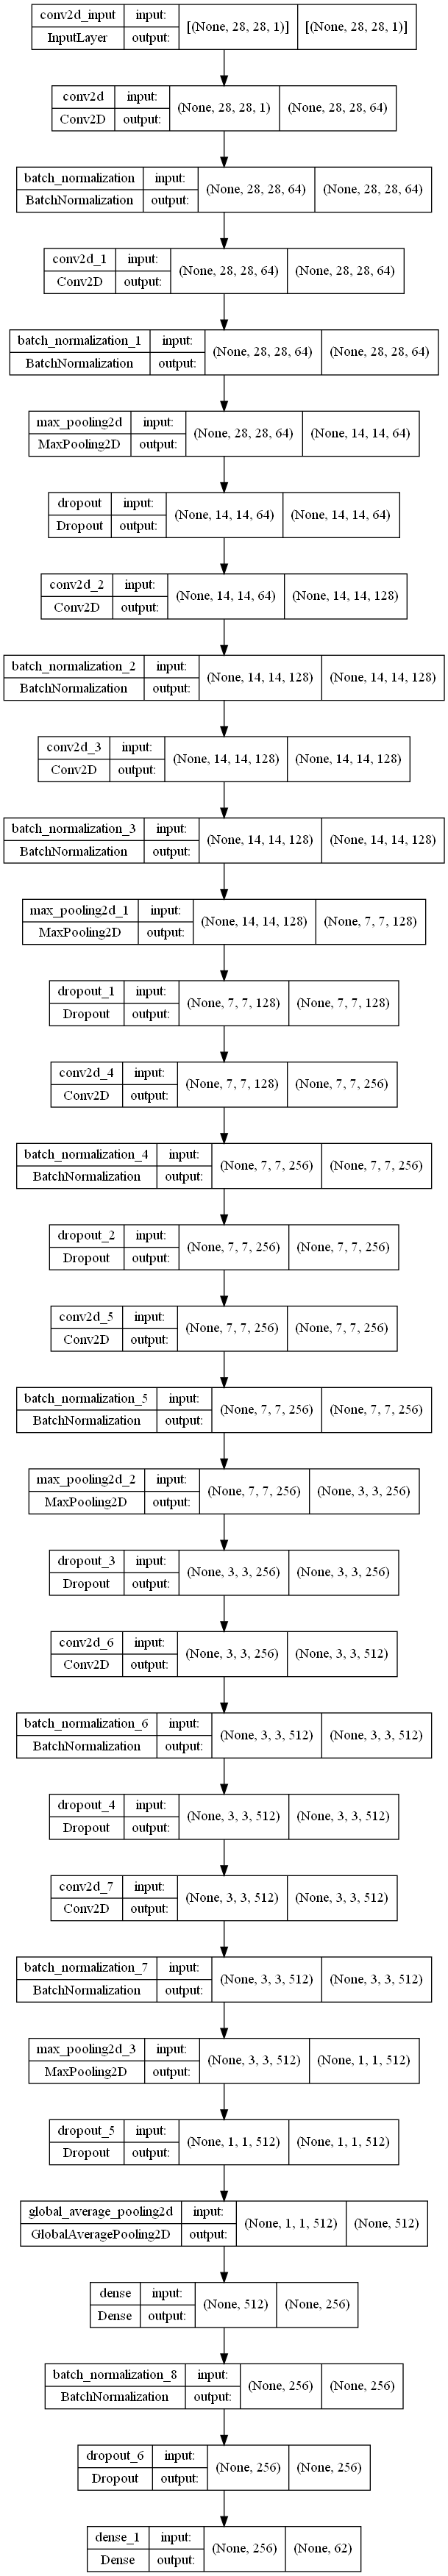

In [7]:
plot_model(model3, to_file='./models/model3_shapes.png', show_shapes=True)

In [8]:
start = time.time()
history3 = model3.fit(X_train, y_train, epochs=30, batch_size=128,
                      verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)
train_time = time.time()-start

Epoch 1/30
4363/4363 [==============================] - ETA: 0s - loss: 0.8546 - accuracy: 0.8028
Epoch 1: val_loss improved from inf to 0.53964, saving model to ./model3_checkpoint\cp-01-0.5396.ckpt
4363/4363 [==============================] - 200s 45ms/step - loss: 0.8546 - accuracy: 0.8028 - val_loss: 0.5396 - val_accuracy: 0.8422 - lr: 0.0010
Epoch 2/30
4363/4363 [==============================] - ETA: 0s - loss: 0.5438 - accuracy: 0.8450
Epoch 2: val_loss improved from 0.53964 to 0.48881, saving model to ./model3_checkpoint\cp-02-0.4888.ckpt
4363/4363 [==============================] - 190s 44ms/step - loss: 0.5438 - accuracy: 0.8450 - val_loss: 0.4888 - val_accuracy: 0.8602 - lr: 0.0010
Epoch 3/30
4363/4363 [==============================] - ETA: 0s - loss: 0.5080 - accuracy: 0.8522
Epoch 3: val_loss improved from 0.48881 to 0.45982, saving model to ./model3_checkpoint\cp-03-0.4598.ckpt
4363/4363 [==============================] - 187s 43ms/step - loss: 0.5080 - accuracy: 0.8522 

Epoch 26/30
4363/4363 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.8856
Epoch 26: val_loss improved from 0.33159 to 0.33059, saving model to ./model3_checkpoint\cp-26-0.3306.ckpt
4363/4363 [==============================] - 192s 44ms/step - loss: 0.3133 - accuracy: 0.8856 - val_loss: 0.3306 - val_accuracy: 0.8842 - lr: 1.0000e-04
Epoch 27/30
4362/4363 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8860
Epoch 27: val_loss improved from 0.33059 to 0.32992, saving model to ./model3_checkpoint\cp-27-0.3299.ckpt
4363/4363 [==============================] - 184s 42ms/step - loss: 0.3118 - accuracy: 0.8860 - val_loss: 0.3299 - val_accuracy: 0.8845 - lr: 1.0000e-04
Epoch 28/30
4363/4363 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8861
Epoch 28: val_loss improved from 0.32992 to 0.32986, saving model to ./model3_checkpoint\cp-28-0.3299.ckpt
4363/4363 [==============================] - 184s 42ms/step - loss: 0.3111 -

In [9]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model3.load_weights(latest)
start = time.time()
model3.evaluate(X_test, y_test, verbose=0)
inference_time = time.time() - start

print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

train time : 5705.434 s
inference time : 23.147 s


Text(0.5, 1.0, 'Loss Curves')

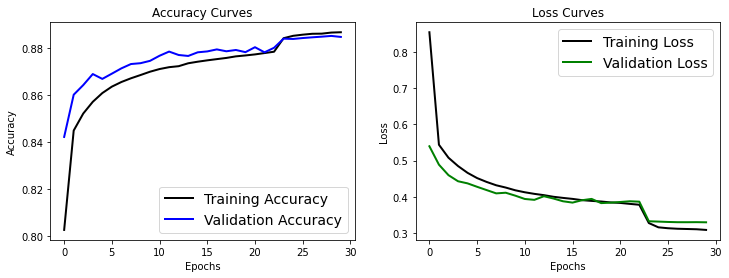

In [10]:
# Accuracy curve
plt.figure(figsize=[12,4])
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history3.history['accuracy'], 'black', linewidth=2.0)
ax1.plot(history3.history['val_accuracy'], 'blue', linewidth=2.0)
ax1.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history3.history['loss'], 'black', linewidth=2.0)
ax2.plot(history3.history['val_loss'], 'green', linewidth=2.0)
ax2.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

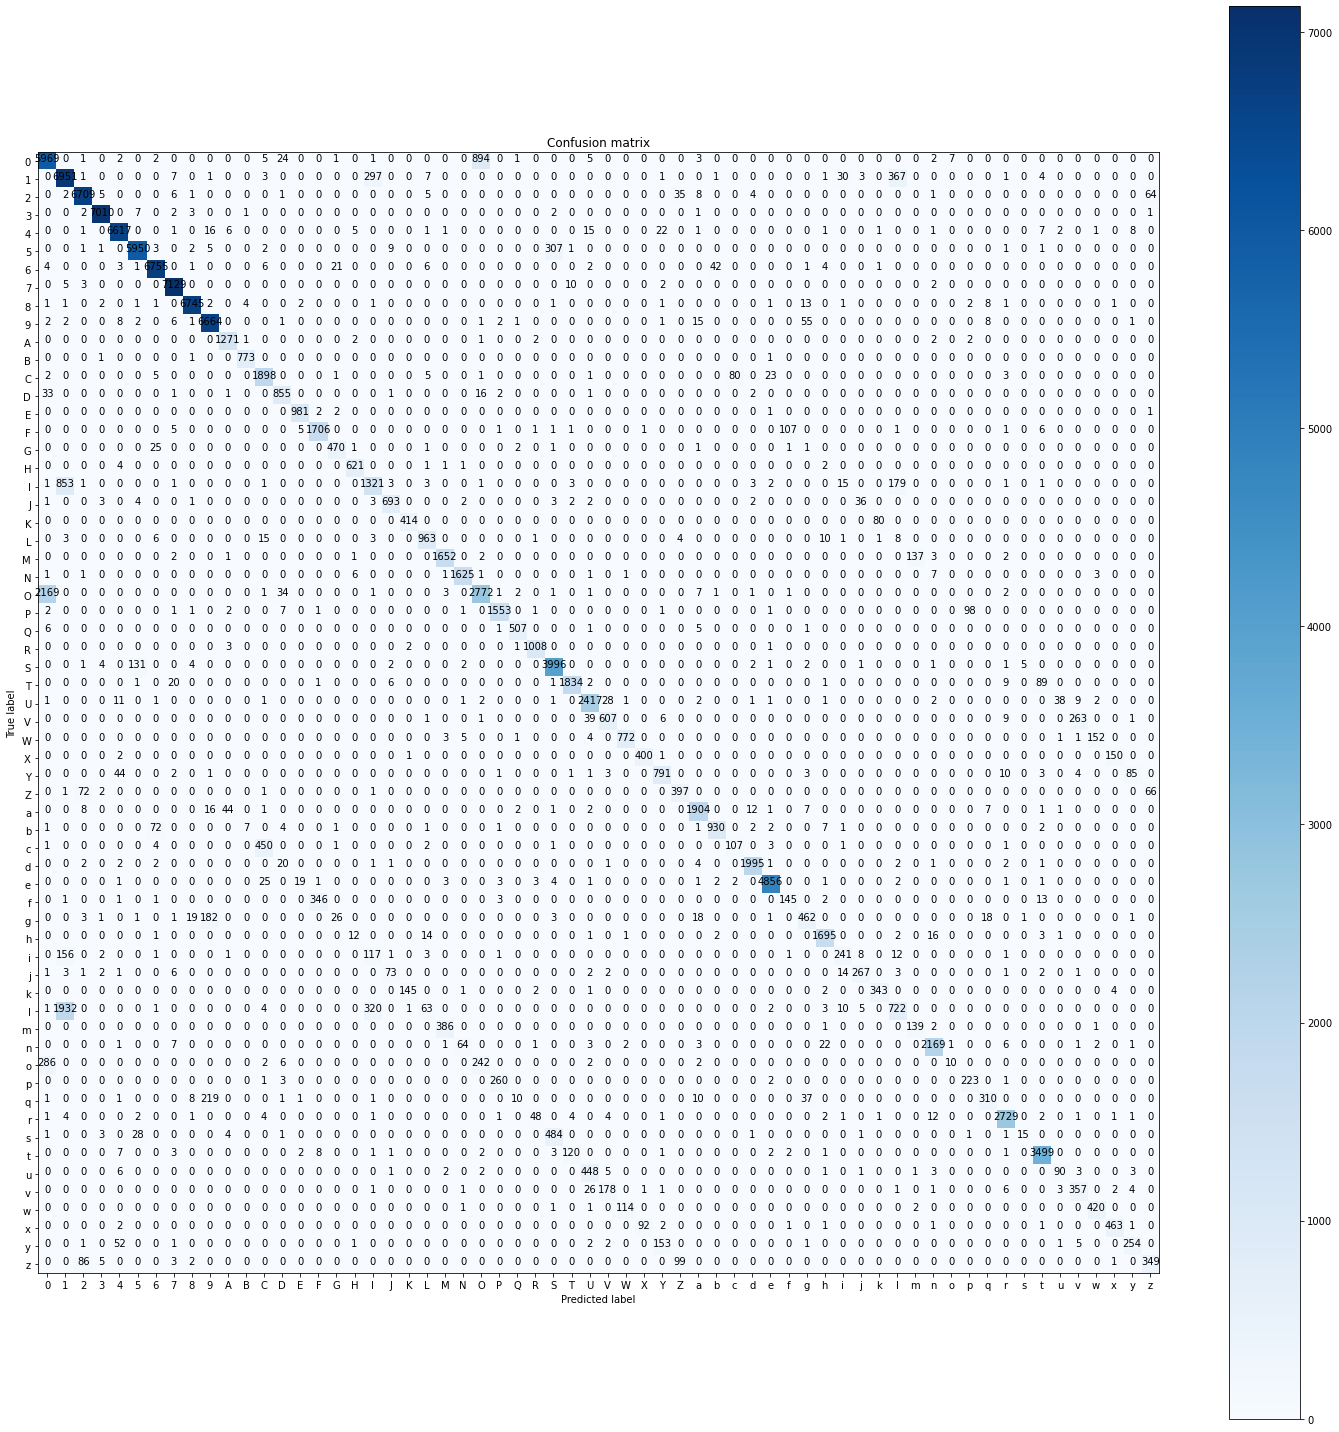

In [11]:
y_pred = model3.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [12]:
model3.save('./models/model3.h5')

## 4. hong

In [9]:
def zero_padding(x, size=((0,0),(2,2),(2,2),(0,0))):
    return np.pad(x, size)

X_train_zp = zero_padding(X_train)
X_val_zp = zero_padding(X_val)
X_test_zp = zero_padding(X_test)

In [5]:
def hong_model():
    model = keras.models.Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(62, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [6]:
model4 = hong_model()
model4.summary()

checkpoint_dir = './model4_checkpoint/'
checkpoint_path = checkpoint_dir + 'cp-{epoch:02d}-{val_loss:.4f}.ckpt'
MCP = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_best_only=True, monitor='val_loss')
ES = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [ES, MCP]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

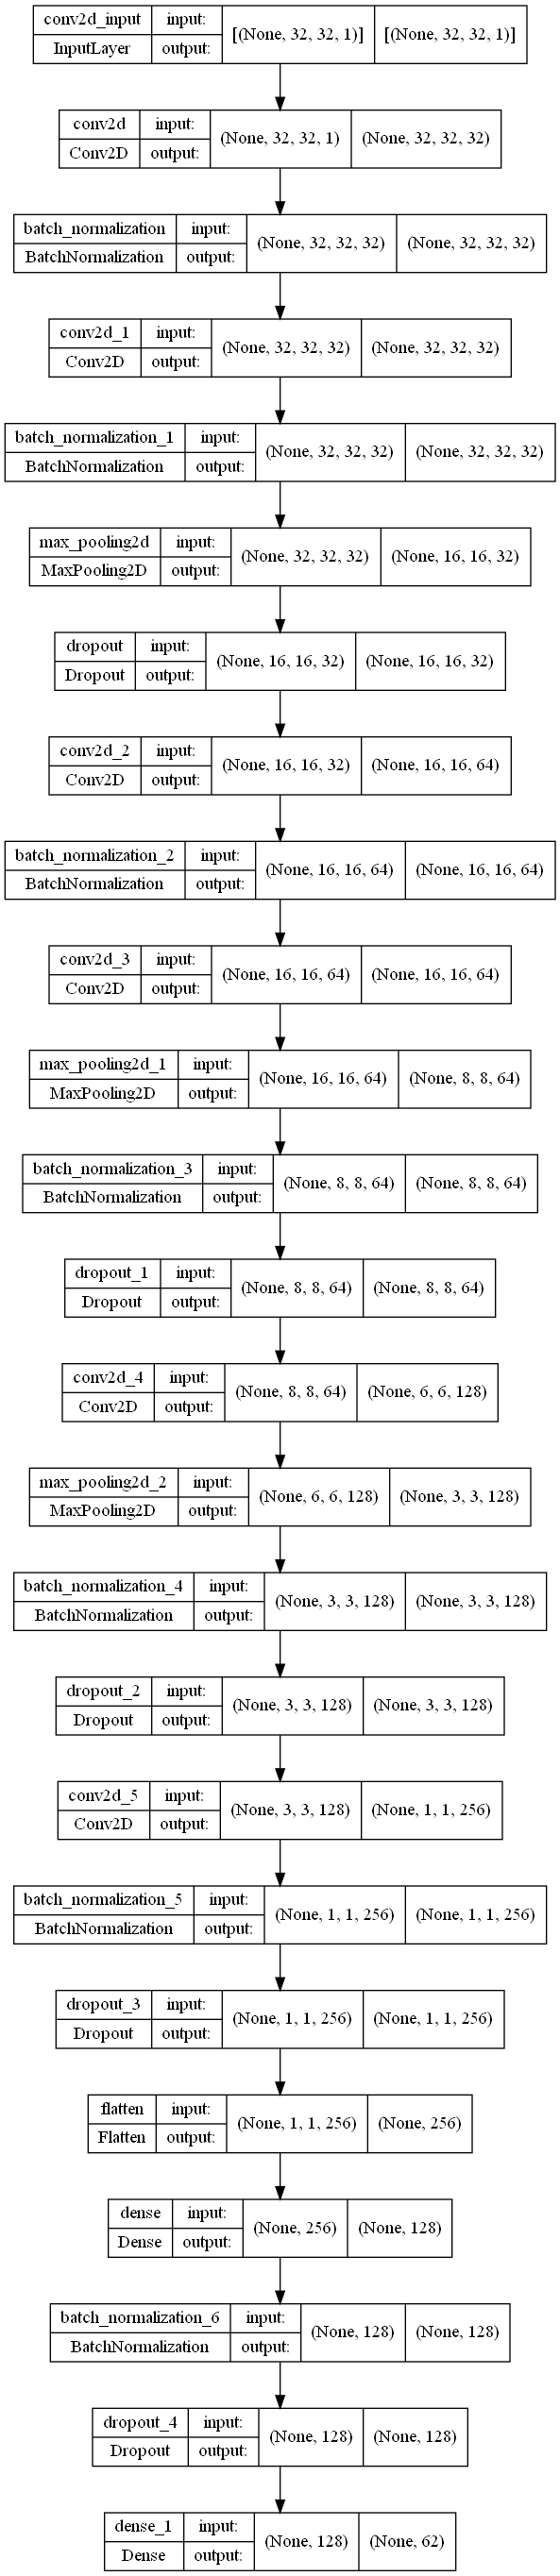

In [7]:
plot_model(model4, to_file='./models/model4_shapes.png', show_shapes=True)

In [10]:
start = time.time()
history4 = model4.fit(X_train_zp, y_train, epochs=100, batch_size=1024,
                      verbose=1, validation_data=(X_val_zp, y_val), callbacks=callbacks_list)
train_time = time.time()-start

Epoch 1/100
546/546 [==============================] - ETA: 0s - loss: 0.9877 - accuracy: 0.7130
Epoch 1: val_accuracy improved from -inf to 0.66848, saving model to ./model4_checkpoint\cp-01-1.0837.ckpt
546/546 [==============================] - 57s 98ms/step - loss: 0.9877 - accuracy: 0.7130 - val_loss: 1.0837 - val_accuracy: 0.6685
Epoch 2/100
545/546 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.8206
Epoch 2: val_accuracy improved from 0.66848 to 0.85182, saving model to ./model4_checkpoint\cp-02-0.4138.ckpt
546/546 [==============================] - 53s 98ms/step - loss: 0.5260 - accuracy: 0.8206 - val_loss: 0.4138 - val_accuracy: 0.8518
Epoch 3/100
545/546 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.8349
Epoch 3: val_accuracy improved from 0.85182 to 0.86109, saving model to ./model4_checkpoint\cp-03-0.3813.ckpt
546/546 [==============================] - 53s 98ms/step - loss: 0.4759 - accuracy: 0.8349 - val_loss: 0.3813 - val_

Epoch 27/100
545/546 [============================>.] - ETA: 0s - loss: 0.3754 - accuracy: 0.8634
Epoch 27: val_accuracy did not improve from 0.87568
546/546 [==============================] - 54s 98ms/step - loss: 0.3754 - accuracy: 0.8634 - val_loss: 0.3359 - val_accuracy: 0.8750
Epoch 28/100
545/546 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8637
Epoch 28: val_accuracy improved from 0.87568 to 0.87571, saving model to ./model4_checkpoint\cp-28-0.3384.ckpt
546/546 [==============================] - 54s 98ms/step - loss: 0.3748 - accuracy: 0.8637 - val_loss: 0.3384 - val_accuracy: 0.8757
Epoch 29/100
545/546 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8639
Epoch 29: val_accuracy improved from 0.87571 to 0.87616, saving model to ./model4_checkpoint\cp-29-0.3349.ckpt
546/546 [==============================] - 54s 98ms/step - loss: 0.3739 - accuracy: 0.8639 - val_loss: 0.3349 - val_accuracy: 0.8762
Epoch 30/100
545/546 [===========

In [11]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model4.load_weights(latest)
start = time.time()
model4.evaluate(X_test_zp, y_test, verbose=0)
inference_time = time.time() - start

print(f'train time : {train_time:.3f} s')
print(f'inference time : {inference_time:.3f} s')

train time : 1896.030 s
inference time : 13.042 s


Text(0.5, 1.0, 'Loss Curves')

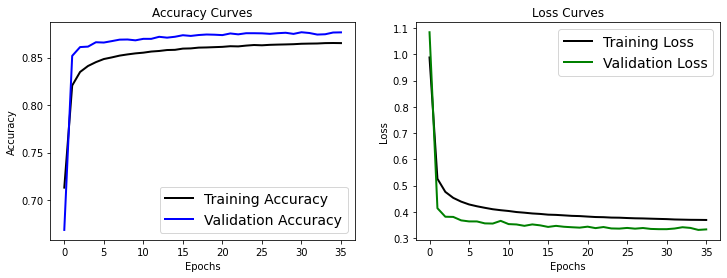

In [12]:
# Accuracy curve
plt.figure(figsize=[12,4])
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history4.history['accuracy'], 'black', linewidth=2.0)
ax1.plot(history4.history['val_accuracy'], 'blue', linewidth=2.0)
ax1.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history4.history['loss'], 'black', linewidth=2.0)
ax2.plot(history4.history['val_loss'], 'green', linewidth=2.0)
ax2.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

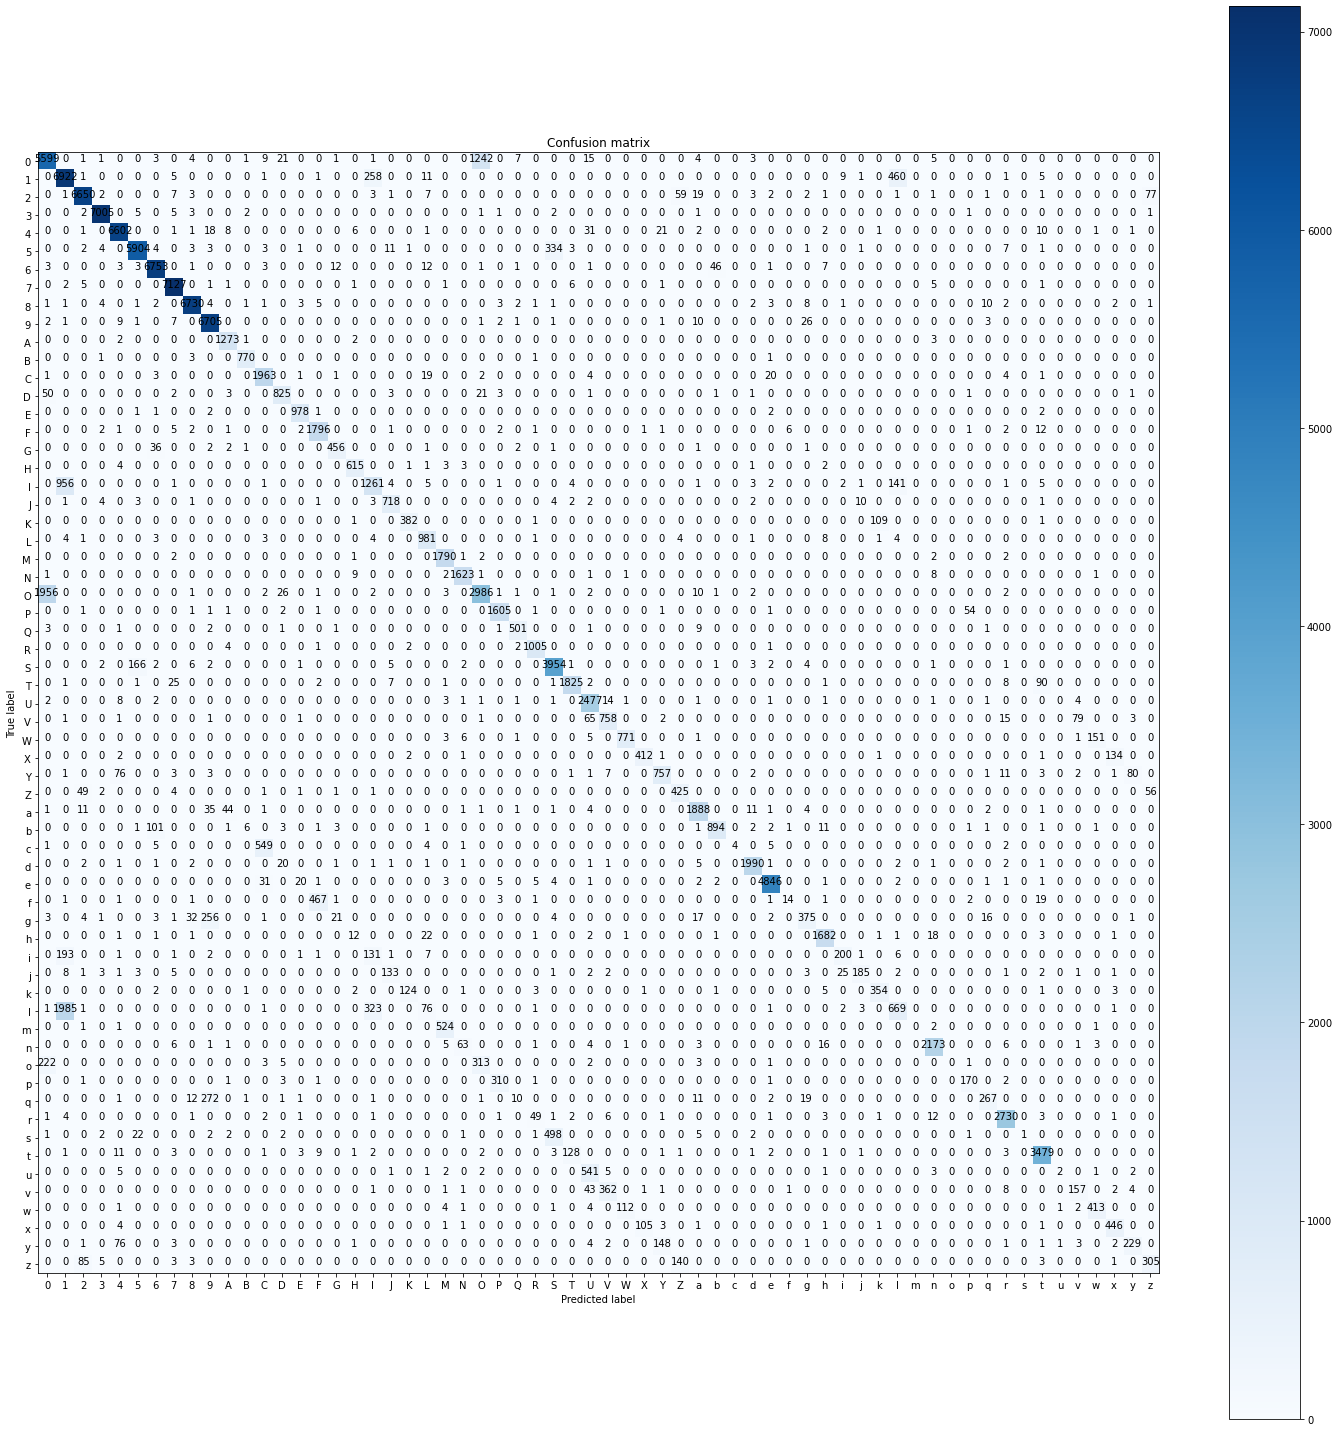

In [14]:
y_pred = model4.predict(X_val_zp)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [15]:
model4.save('./models/model4.h5')

#### model1
- epoch: 11
- loss: 0.3279
- accuracy: 0.8770
- val_loss: 0.3442
- val_accuracy: 0.8769
- train time : 1273.057 s
- inference time : 10.560 s
---
#### model2
- epoch: 17
- loss: 0.3023 
- accuracy: 0.8837 
- val_loss: 0.3332 
- val_accuracy: 0.8764
- train time : 684.323 s
- inference time : 10.732 s
---
#### model3
- epoch: 30
- loss: 0.3086 
- accuracy: 0.8867
- val_loss: 0.3296 
- val_accuracy: 0.8847
- train time : 5705.434 s
- inference time : 23.147 s
---
#### model4
- epoch: 36
- loss: 0.3723 
- accuracy: 0.8646 
- val_loss: 0.3340 
- val_accuracy: 0.8767
- train time : 1896.030 s
- inference time : 13.042 s
---
가장 inference time이 짧은 모델: model1  
가장 val_accuaracy가 높은 모델: model3   

# Test

In [8]:
from keras.models import load_model

In [9]:
final_model_fast_infer = load_model('./models/model1.h5')
final_model_high_acc = load_model('./models/model3.h5')

In [12]:
start = time.time()
score = final_model_fast_infer.evaluate(X_test,y_test)
inference_time = time.time() - start
print(f'test score: {score[1]:.4f}')
print(f'test loss: {score[0]:.4f}')
print(f'inference time: {inference_time:.3f} s')

3636/3636 [==============================] - 11s 3ms/step - loss: 0.3385 - accuracy: 0.8759
test score: 0.8759
test loss: 0.3385
inference time: 11.034 s


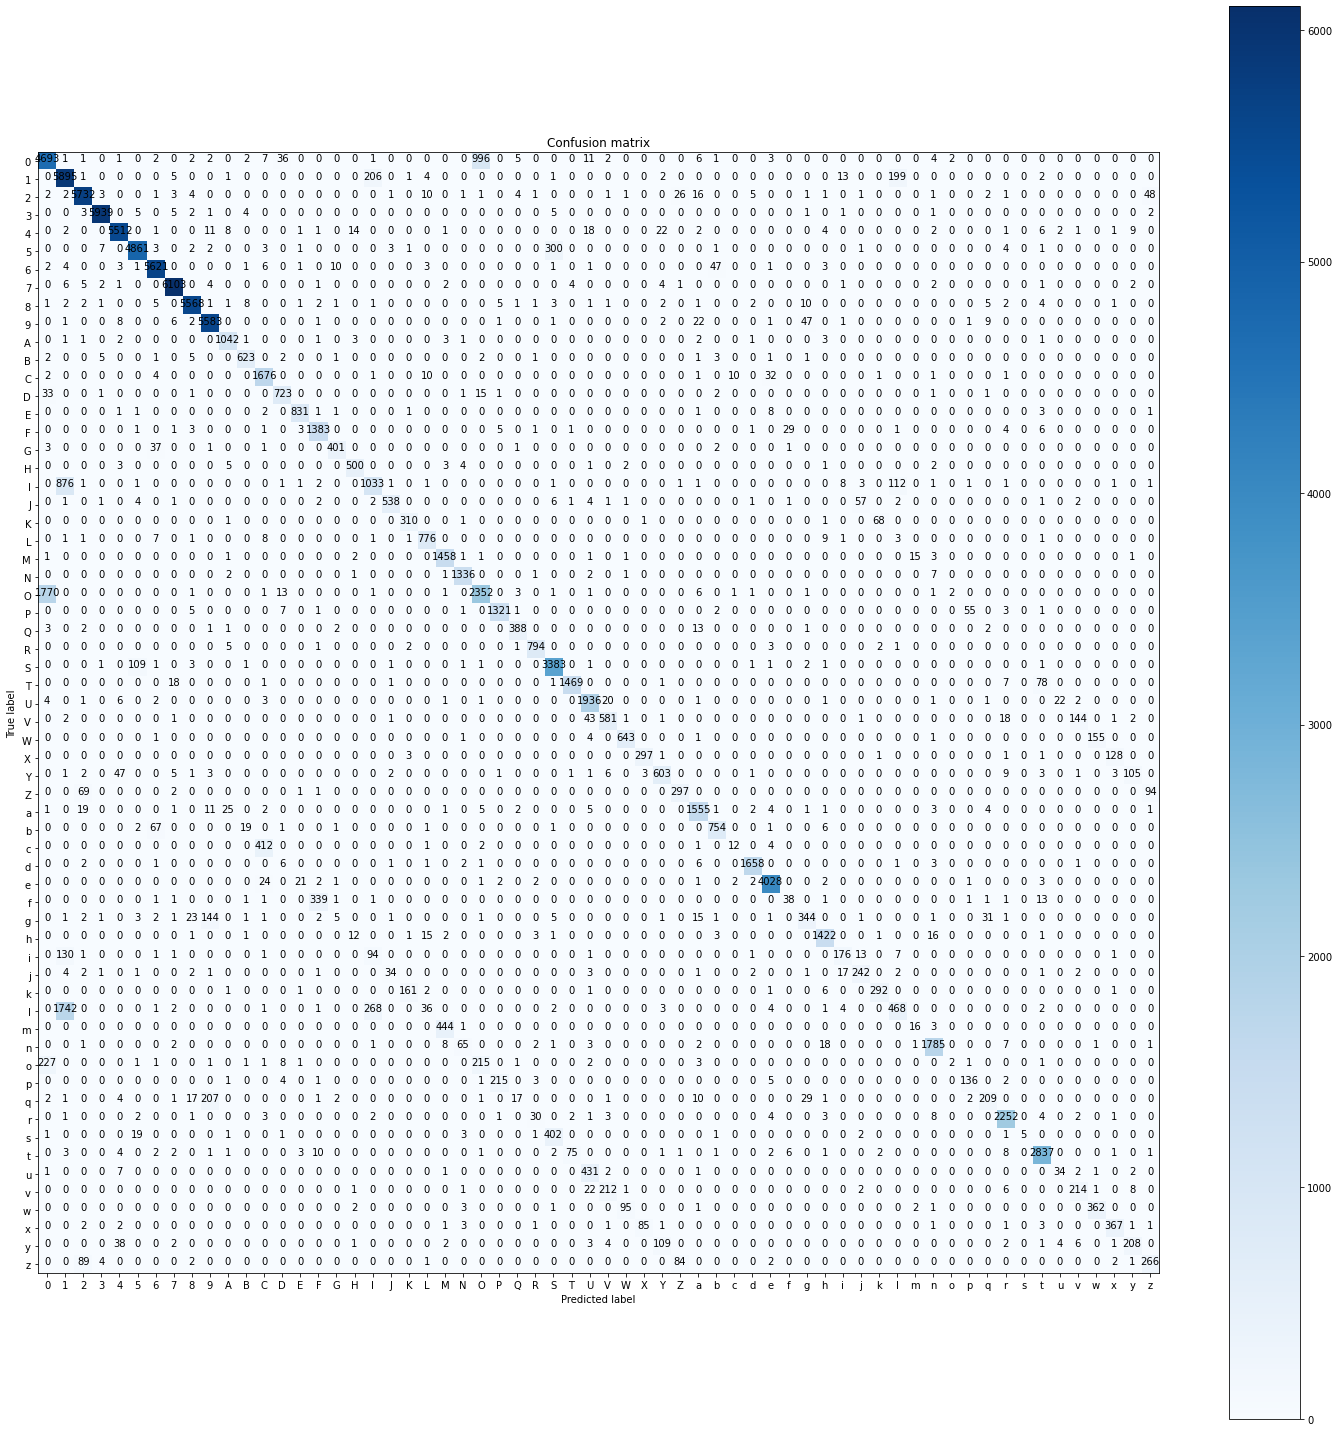

In [18]:
y_pred = final_model_fast_infer.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [13]:
start = time.time()
score = final_model_high_acc.evaluate(X_test,y_test)
inference_time = time.time() - start
print(f'test score: {score[1]:.4f}')
print(f'test loss: {score[0]:.4f}')
print(f'inference time: {inference_time:.3f} s')

3636/3636 [==============================] - 20s 5ms/step - loss: 0.3267 - accuracy: 0.8853
test score: 0.8853
test loss: 0.3267
inference time: 20.525 s


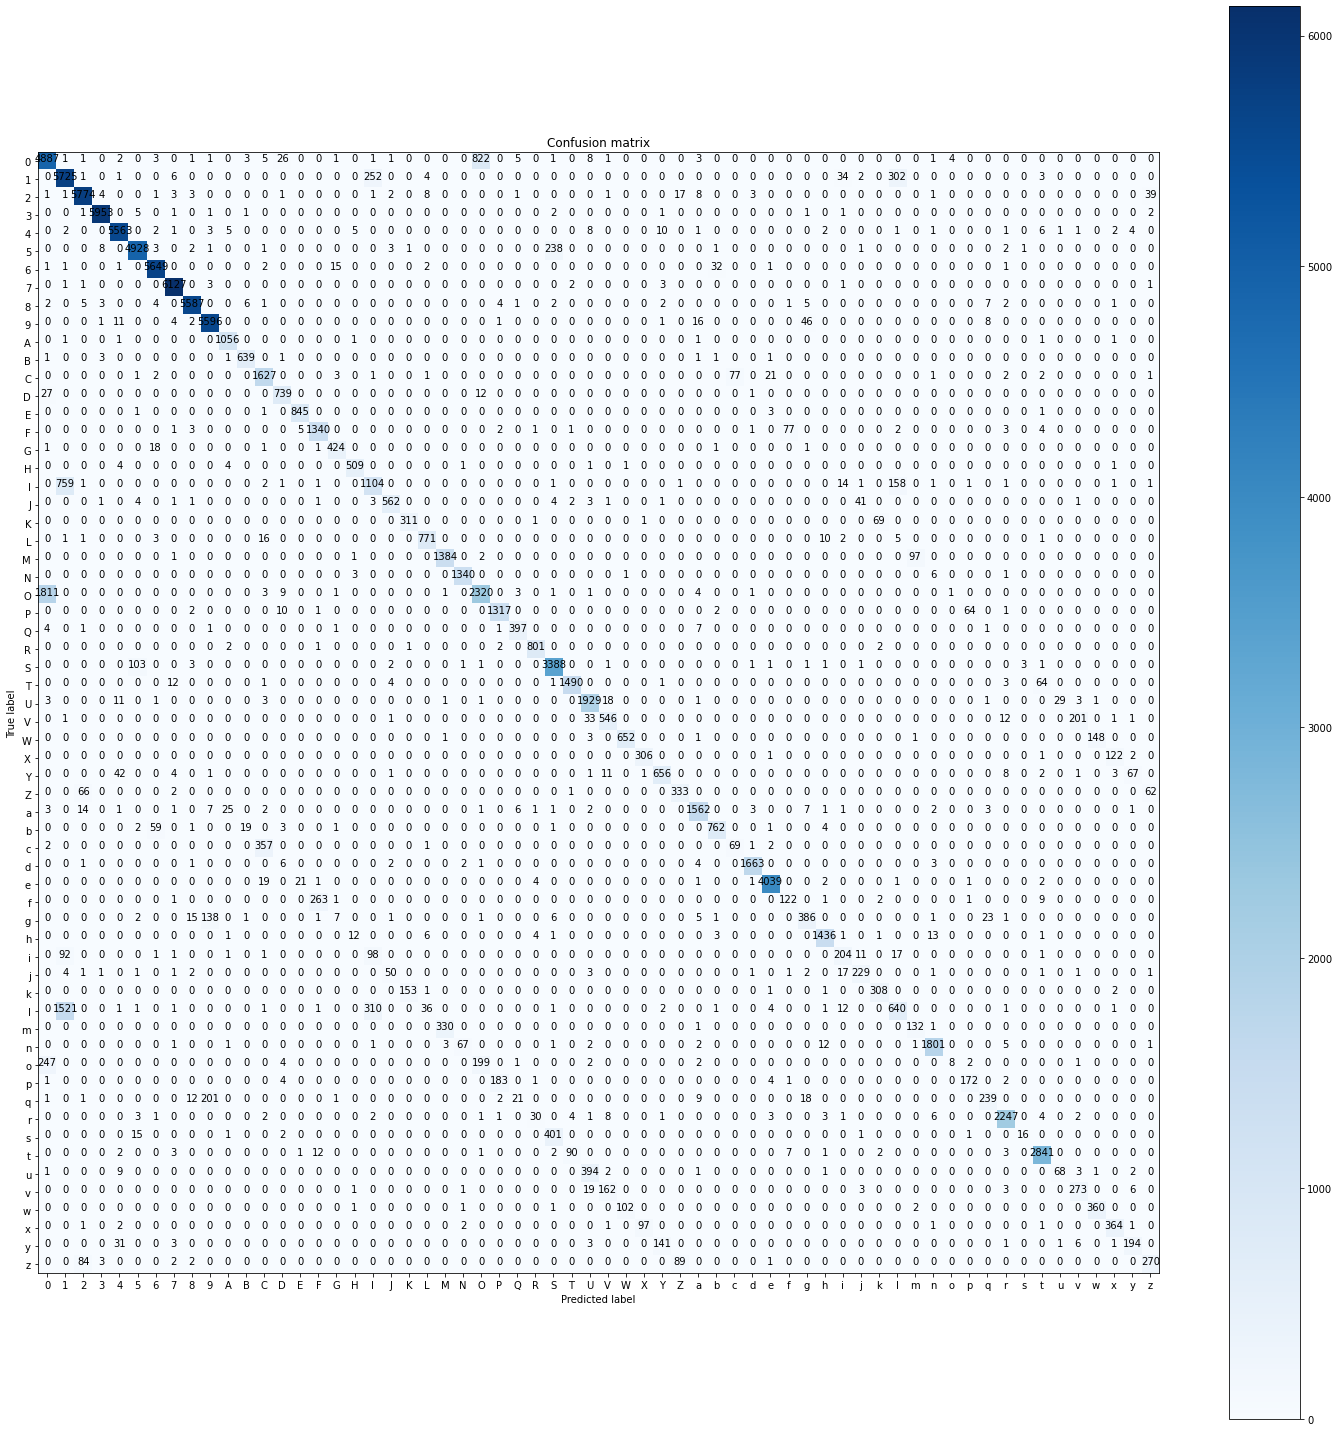

In [19]:
y_pred = final_model_high_acc.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

inference time 기준  
  
LeNet5:  
loss: 0.3637 accuracy: 0.8672 inference time: 10.560 s  
  
model1:  
loss: 0.3385 accuracy: 0.8759 inference time: 11.034 s

---
accuracy 기준  
  
MobileNetV2:  
loss: 0.3194 - accuracy: 0.8794 inference time: 38.471 s  
  
model3:  
loss: 0.3267 - accuracy: 0.8853 inference time: 20.525 s


In [21]:
test_byclass = pd.read_csv('구운너구리_emnist_손글씨_shuffled.csv', header=None)

# label
s_alph=list(string.ascii_lowercase)
l_alph=list(string.ascii_uppercase)
number = [str(i) for i in range(10)]
clss = number+l_alph+s_alph
bycl_clss=np.transpose(number+l_alph+s_alph)
test_byclass.iloc[:,0] = np.transpose(bycl_clss[test_byclass.iloc[:,0].tolist()])

# data label 나누기
X_test = test_byclass.iloc[:, 1:].to_numpy()
test_labels = test_byclass.iloc[:, 0]

# one-hot coding
y_test = pd.get_dummies(test_labels).to_numpy()

X_test = (X_test/255).reshape(-1, 28, 28, 1).astype(float)

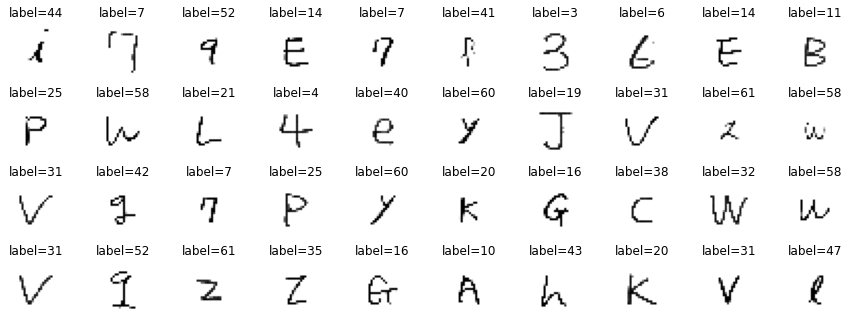

In [6]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(f'label={np.argmax(y_test[i])}', y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=-0.1)
plt.show()

In [22]:
start = time.time()
score = final_model_fast_infer.evaluate(X_test,y_test)
inference_time = time.time() - start
print(f'test score: {score[1]:.4f}')
print(f'test loss: {score[0]:.4f}')
print(f'inference time: {inference_time:.3f} s')

92/92 [==============================] - 0s 3ms/step - loss: 3.5434 - accuracy: 0.4766
test score: 0.4766
test loss: 3.5434
inference time: 0.361 s


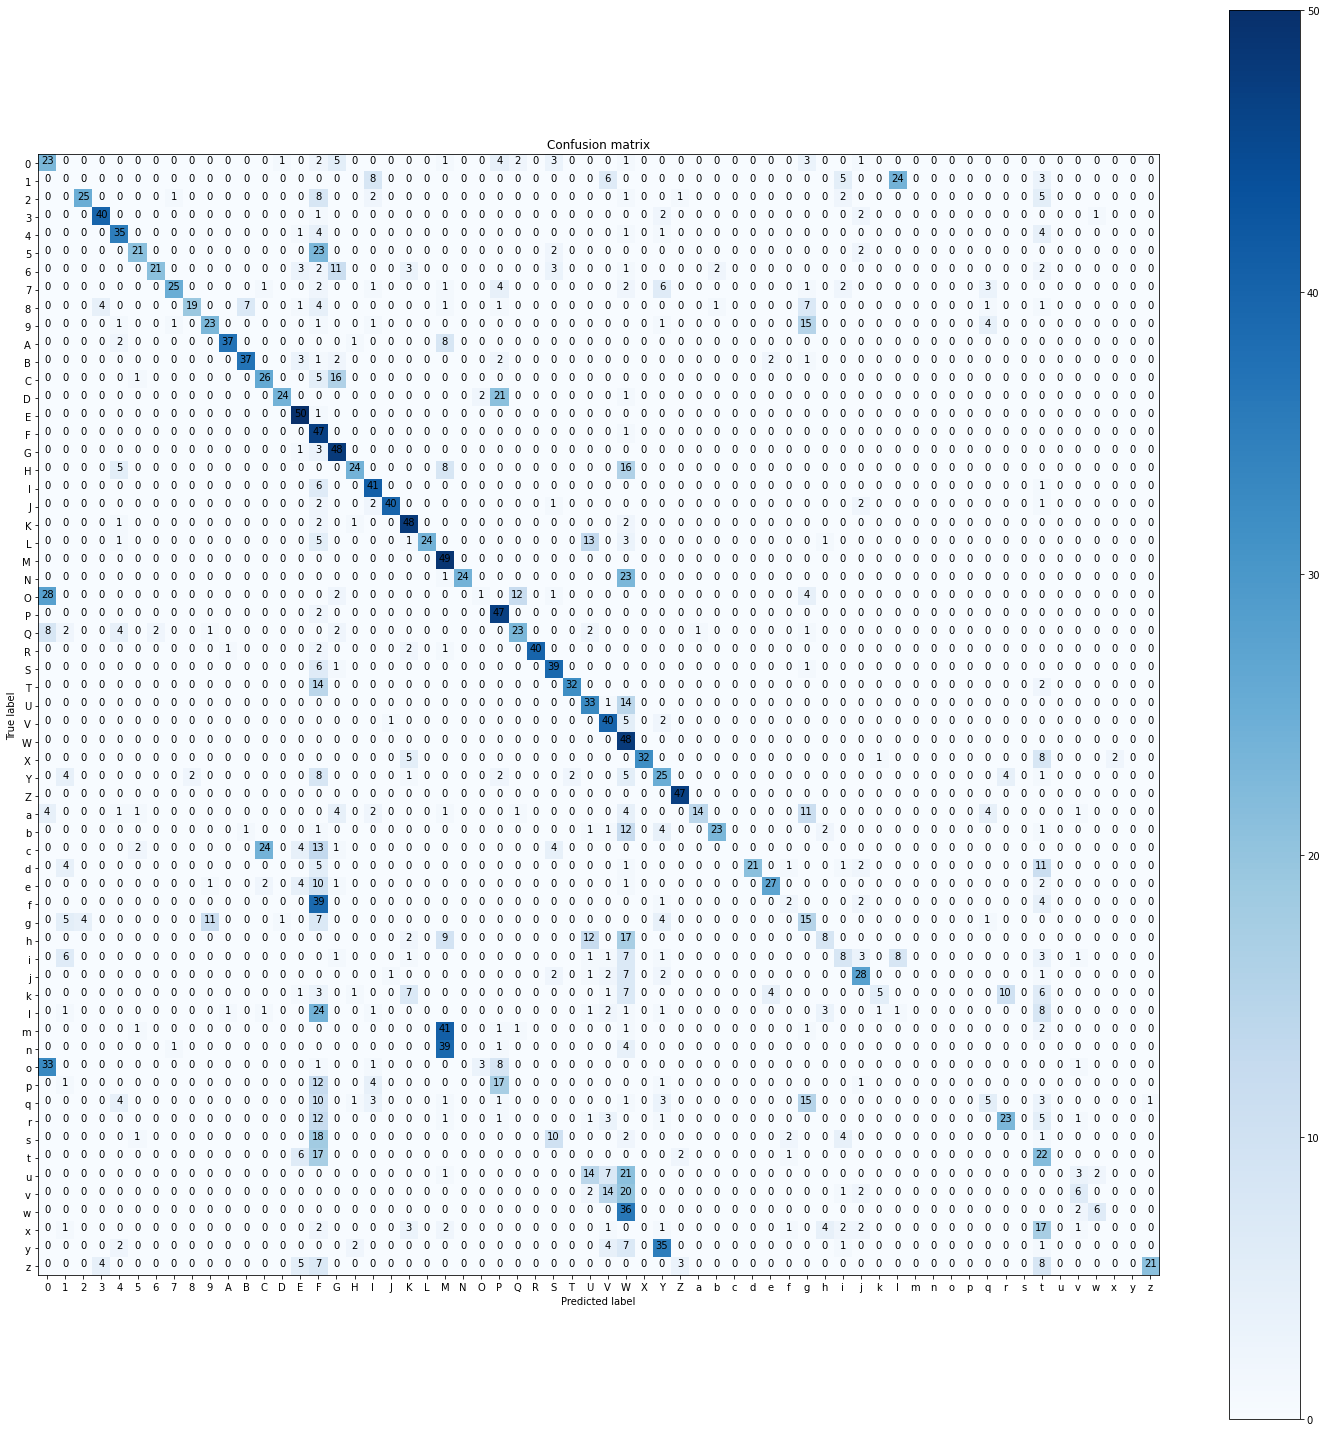

In [11]:
y_pred = final_model_fast_infer.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))

In [23]:
start = time.time()
score = final_model_high_acc.evaluate(X_test,y_test)
inference_time = time.time() - start
print(f'test score: {score[1]:.4f}')
print(f'test loss: {score[0]:.4f}')
print(f'inference time: {inference_time:.3f} s')

92/92 [==============================] - 1s 8ms/step - loss: 1.3300 - accuracy: 0.6439
test score: 0.6439
test loss: 1.3300
inference time: 0.757 s


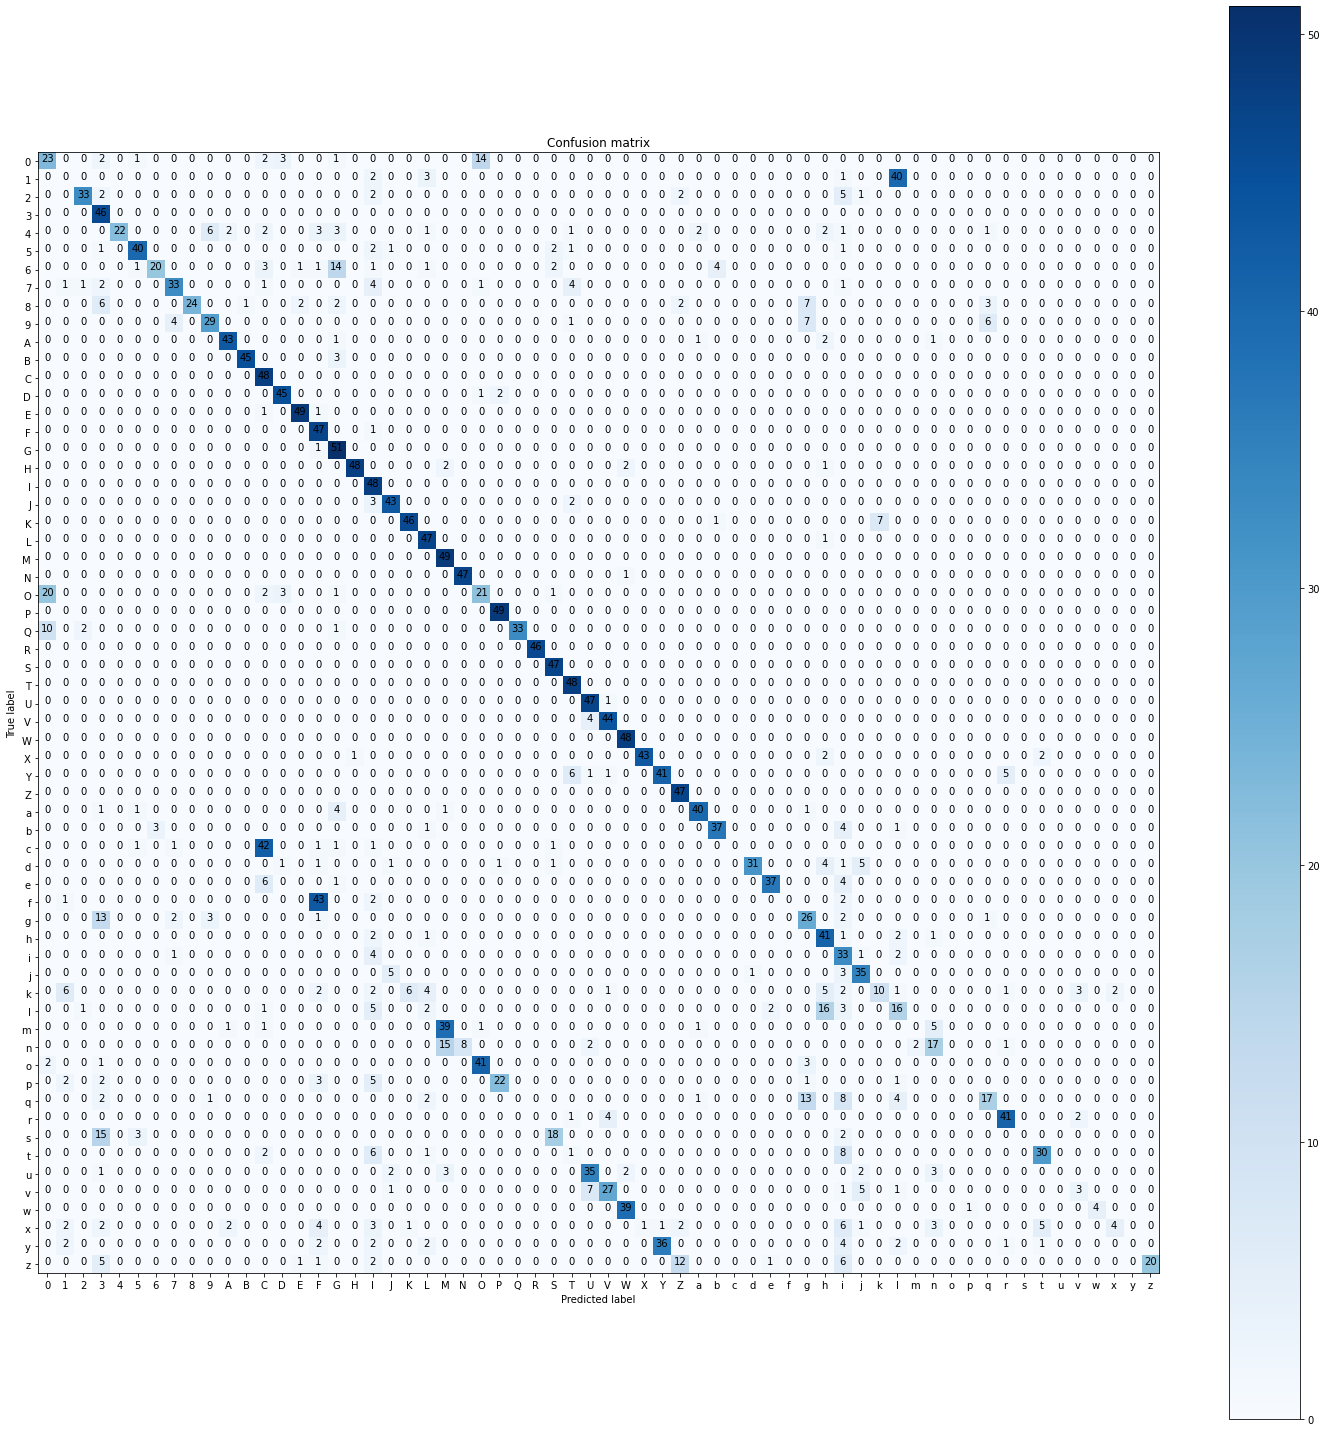

In [13]:
y_pred = final_model_high_acc.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
fig = plot_confusion_matrix(confusion_mtx, byclass_clss, figsize=(20, 20))